In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [69]:
df = pd.read_csv('../input/iris/Iris.csv')
df = df.drop(['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e2e71d278>,
      dtype=object)

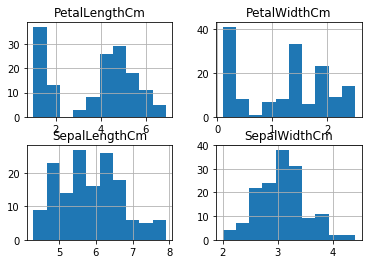

In [70]:
df.hist()

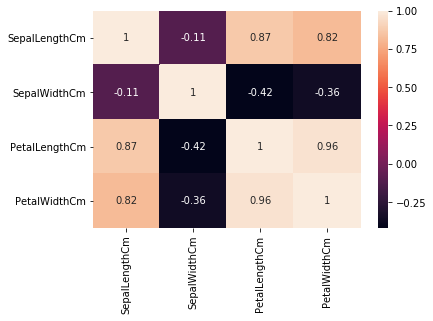

In [71]:
sns.heatmap(df.corr(),annot=True)

## Logistic Regression ##

In [72]:
X = df[['SepalWidthCm','PetalWidthCm','SepalLengthCm','PetalLengthCm']]
y = df['Species']
y_pred = cross_val_predict(LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=300),X,y,cv=5)
print(metrics.classification_report(y_pred,y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.98      0.96        48
 Iris-virginica       0.98      0.94      0.96        52

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



## KNN ##

,k,accuracy
0,1,0.960000
1,2,0.946667
2,3,0.966667
3,4,0.973333
4,5,0.973333
5,6,0.980000
6,7,0.980000
7,8,0.966667
8,9,0.973333
9,10,0.980000


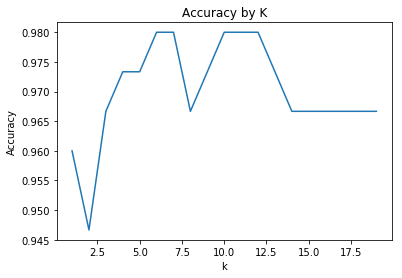

In [73]:
X = df[['SepalWidthCm','PetalWidthCm','SepalLengthCm','PetalLengthCm']]
y = df['Species']
accs = []
for i in range(1,20):
    y_pred = cross_val_predict(KNeighborsClassifier(i),X,y,cv=5)
    accs.append(metrics.accuracy_score(y_pred,y))
ax = sns.lineplot(x=[i for i in range(1,20)],y=accs)
ax.set(xlabel="k",ylabel="Accuracy",title="Accuracy by K")
pd.DataFrame({"k":range(1,20),"accuracy":accs})

Most k values perform very similarly, I chose 6

In [74]:
y_pred = cross_val_predict(KNeighborsClassifier(6),X,y,cv=5)
metrics.accuracy_score(y_pred,y)

0.98

## Random Forest ##

,max_depth,accuracy
0,3,0.966667
1,5,0.953333
2,7,0.953333
3,12,0.960000
4,15,0.953333
5,50,0.940000
6,100,0.953333


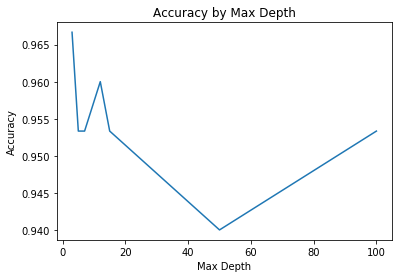

In [75]:
X = df[['SepalWidthCm','PetalWidthCm','SepalLengthCm','PetalLengthCm']]
y = df['Species']
accs = []
depths = [3,5,7,12,15,50,100]
for i in depths:
    y_pred = cross_val_predict(RandomForestClassifier(max_depth=i),X,y,cv=5)
    accs.append(metrics.accuracy_score(y_pred,y))
ax = sns.lineplot(x=[i for i in depths],y=accs)
ax.set(xlabel="Max Depth",ylabel="Accuracy",title="Accuracy by Max Depth")
pd.DataFrame({"max_depth":depths,"accuracy":accs})

It appears that optimal max_depth is 5

You could use more models, but it's kind of overkill.

Thanks for reading :)